UNI-ID:  SVW2112

# MNIST Sign Language

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import tensorflow as tf

In [2]:
class SignLanguage:
    def __init__(self):
        self.model = None
        
        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()
    
    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """
        
        # Create a Sequential model
        self.model = Sequential() 
        self.model.add(Conv2D(32, (5, 5), activation='relu',padding='same', input_shape=(28, 28, 1)))
        self.model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='same'))
        self.model.add(Conv2D(64, (5, 5), activation='relu',padding='same'))
        self.model.add(MaxPooling2D(pool_size=(2, 2),strides=2,padding='same')) 
        self.model.add(Flatten())
        self.model.add(Dense(1024,activation='relu')) 
        self.model.add(Dropout(0.5)) 
        self.model.add(Dense(25,activation='softmax'))
        
        # Compile the model with categorical cross-entropy
        self.model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
    
    def prepare_data(self, images, labels):
        """
        Use this method to normalize the dataset and split it into train/test.
        Save your data in self.data["train"] and self.data["test"] as a tuple
        of (images, labels)
        
        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """
        
        # Load the images and reshape each into a 2D image (28, 28, 1)
        dataset_images = [np.reshape(image,(28,28,1)) for image in images]

        # Convert images to numpy and normalize them 
        dataset_images = np.array(dataset_images)/255.0

        # Convert the labels to Keras categorical ones
        dataset_labels = tf.keras.utils.to_categorical(np.array(labels), num_classes = 25)

        # Split the data into training (80%) and validation (20%) 
        train_images, test_images, train_labels, test_labels = train_test_split(dataset_images, dataset_labels, train_size = 0.80)
        self.data["train"] = [train_images, train_labels]
        self.data["test"] = [test_images, test_labels]
    
    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        Use model.fit() to train your model. Make sure to return the history for a neat visualization.
        
        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """
        return self.model.fit(self.data['train'][0], self.data['train'][1], 
                              batch_size = batch_size, epochs = epochs, 
                              verbose = verbose, validation_data = self.data['test'])
    
    def predict(self, data):
        """
        Use the trained model to predict labels for test data.
        
        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """
        
        # Normalize the data in the same way as training data
        dataset_images = [np.reshape(image,(28,28,1)) for image in data]
        dataset_images = np.array(dataset_images)/255.0

        # self.model.predict() and np.argmax( , axis=1) might help
        return np.argmax(self.model.predict(dataset_images), axis = 1)
    
    def visualize_data(self, data):
        """
        Visualizing the hand gestures
        
        :param data: numpy array of images
        """
        if data is None: return
        
        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object
        
        :param history: return value from model.fit()
        """
        if history is None: return
        
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

# Grading Script

Do NOT modify this section

In [3]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [4]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

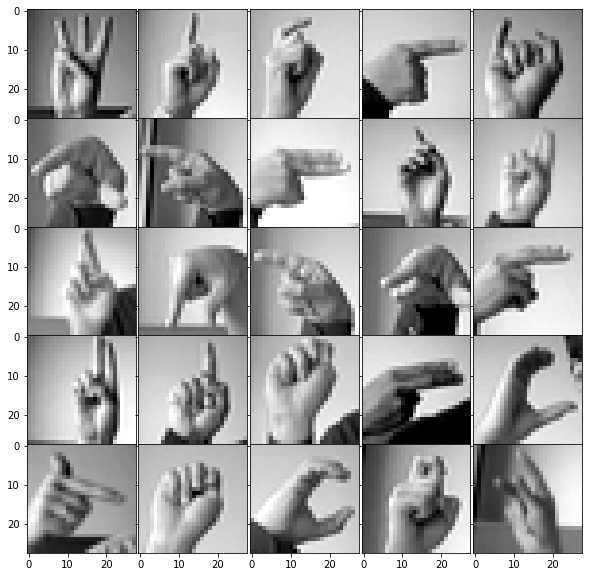

In [5]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30
172/172 [==============================] - 7s 17ms/step - loss: 1.4964 - accuracy: 0.5468 - val_loss: 0.3074 - val_accuracy: 0.9069
Epoch 2/30
172/172 [==============================] - 2s 12ms/step - loss: 0.2128 - accuracy: 0.9339 - val_loss: 0.0346 - val_accuracy: 0.9989
Epoch 3/30
172/172 [==============================] - 2s 11ms/step - loss: 0.0549 - accuracy: 0.9857 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 4/30
172/172 [==============================] - 2s 12ms/step - loss: 0.0223 - accuracy: 0.9955 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/30
172/172 [==============================] - 2s 11ms/step - loss: 0.0107 - accuracy: 0.9983 - val_loss: 8.9896e-04 - val_accuracy: 1.0000
Epoch 6/30
172/172 [==============================] - 2s 14ms/step - loss: 0.0071 - accuracy: 0.9990 - val_loss: 0.0018 - val_accuracy: 0.9996
Epoch 7/30
172/172 [==============================] - 2s 14ms/step - loss: 0.0065 - accuracy: 0.9990 - val_loss: 7.2190e-04 - val_accuracy

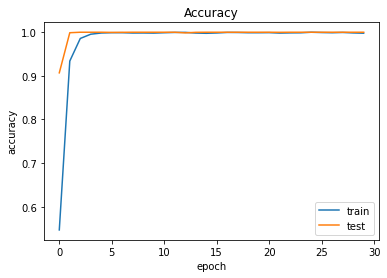

In [6]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [7]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images)
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 [==============================] - 1s 2ms/step
0.9431121026213051
